## Open CV Python

In [35]:
# importing library
import cv2 as cv
print(cv.__version__)
import numpy as np
import sys

4.2.0


In [36]:
#Loading and Displaying the Original Image

#img = cv.imread('soccer_reduced.jpg',-1) #Choose the path for import

img = cv.imread('data/soccer_reduced.jpg', -1)
cv.imshow("original",img)
cv.waitKey(0)

cv.destroyAllWindows()

In [37]:
#spliting HSV channel
img_2 = cv.cvtColor(img, cv.COLOR_BGR2HLS)

cv.imshow('HLS', img_2)
cv.waitKey(0)

cv.destroyAllWindows()

H, L, S = cv.split(img_2)
cv.imshow("Hue", H)
cv.waitKey(0)
  
cv.imshow("Lightness", L)
cv.waitKey(0)

cv.imshow("Saturation", S)
cv.waitKey(0)
  
cv.destroyAllWindows()

In [38]:
# Getting Individual Pixel value
print(int(L[1,1]))

16


In [39]:
# Getting Individual Pixel Value in each channel
print(int(img[1,1,1]))
print(int(img_2[1,1,1]))

25
16


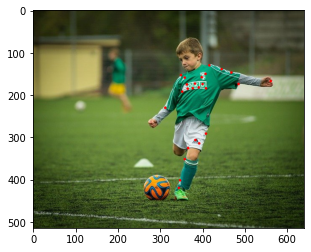

(<matplotlib.image.AxesImage at 0x7f6f145311f0>, None)

In [40]:
# Finding Corners
from matplotlib import pyplot as plt

img_gray = cv.cvtColor(img_2, cv.COLOR_BGR2GRAY)
img_RGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)


corners = cv.goodFeaturesToTrack(img_gray, 25, 0.01, 10)
corners = np.int0(corners)

for i in corners:
    x, y = i.ravel()
    cv.circle(img_RGB, (x,y),3,255,-1)

plt.imshow(img_RGB),plt.show()

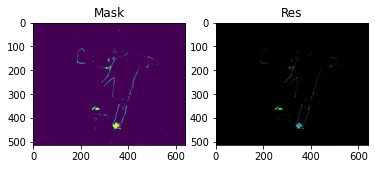

In [41]:
# Color Detection

#Detecting Green Area
lower_green = np.array([50, 50, 50])
upper_green = np.array([70, 255, 255])


mask = cv.inRange(img_2, lower_green, upper_green)

res = cv.bitwise_and(img_2, img_2, mask = mask)

plt.subplot(121)
plt.title('Mask')
plt.imshow(mask)

plt.subplot(122)
plt.title('Res')
plt.imshow(res)



Text(0.5, 1.0, 'Saturation')

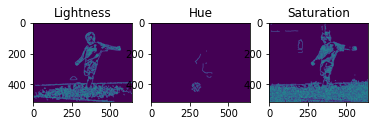

In [42]:
# Edge detection

edges = cv.Canny(L, 100, 250)
edges2 = cv.Canny(H, 100, 300)
edges3 = cv.Canny(S, 100, 300)

plt.subplot(131)
plt.title('Lightness')
plt.imshow(edges)

plt.subplot(132)
plt.imshow(edges2)
plt.title('Hue')

plt.subplot(133)
plt.imshow(edges3)
plt.title('Saturation')
